In [1]:
import numpy as np

from matplotlib import cm, colors, pyplot
import matplotlib.pyplot as plt

import hpelm

## ELMVIS: use ELM as cost function

In [4]:
# select number of neurons in ELM
nn = 5

In [9]:
N = 50
iter = 200_000
d = 1
R = 3

In [10]:
x0 = np.arange(0, 2.1, 2.1/N)
X = np.vstack((2*x0**0.5*np.cos(R*np.pi*x0**0.5), 
               2*x0**0.5*np.sin(R*np.pi*x0**0.5))).T
X = X - np.tile(np.mean(X,0), (N,1))
X = X / np.tile(np.std(X,0), (N,1))
Xc = X.copy()

X0 = np.arange(0,1,1./N)
X0 = X0 - np.tile(np.mean(X0,0), (N,))
X0 = X0 / np.tile(np.std(X0,0), (N,))
X0 = np.vstack((X0, np.ones((N,)))).T

for rep in range(1): 
    
    np.random.shuffle(X0)
    I = np.array(range(N))
    
    W = np.random.randn(d+1, nn) * np.sqrt(3)
    H = np.tanh(np.dot(X0, W))
    
    HH = np.linalg.pinv(H)
    Xhat = np.dot(H, np.dot(HH, X))
    besterr = np.mean((Xhat - X)**2)
    
    for rep in range(iter):
        k = 1 + int(np.random.rand() * N/3)    
        It = np.array(range(N))
        np.random.shuffle(It)
        It = It[:2*k]
        
        Xnew = X.copy()
        Xnew[It[k:2*k],:] = X[It[:k],:]    
        Xnew[It[:k],:] = X[It[k:2*k],:]    
        
        Xhat = np.dot(H, np.dot(HH, Xnew))
        err = np.mean((Xhat - Xnew)**2)
        
        if err < besterr:
            besterr = err
            X = Xnew
            I2 = I.copy()
            I2[It[k:2*k]] = I[It[:k]]        
            I2[It[:k]] = I[It[k:2*k]]        
            I = I2
            W1 = np.dot(np.linalg.pinv(H), X)
            # print("vN", rep, err)
            print(".", end="")


........................................................................................................................................

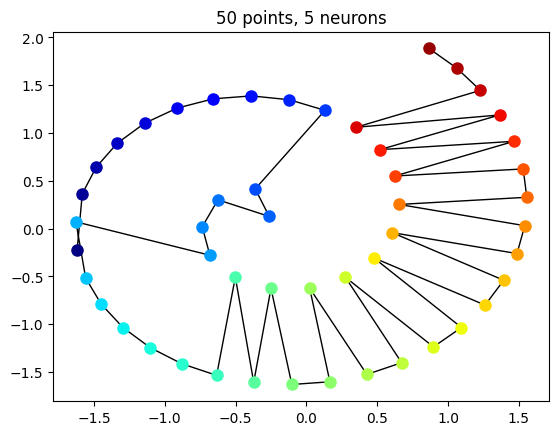

In [11]:
fig = pyplot.figure()
ax = fig.add_subplot(111)

jet = cm.ScalarMappable(colors.Normalize(0,1), cm.jet)
xc = []
for xx in np.arange(0,1,1./N):
  xc.append(jet.to_rgba(xx))

# apply index
idx = np.argsort(X0[:,0])  # index determined by increasing order of 1d points
X = X[idx,:]
ax.plot(X[:,0], X[:,1], '-', linewidth=1, color='black')
ax.set_title("%d points, %d neurons" % (N, nn))
for i in range(len(X0)):
    ax.plot(X[i,0], X[i,1], 'o', color=xc[i], markersize=8)

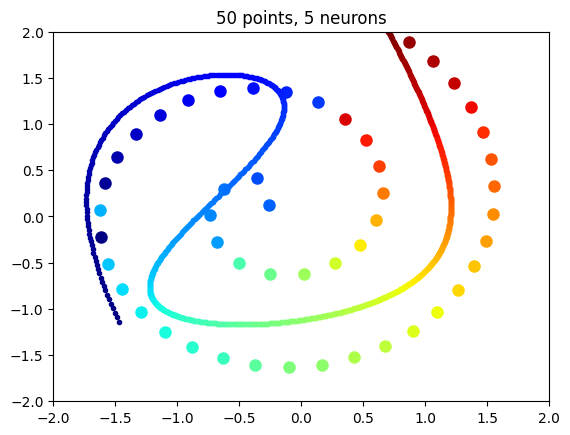

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
jet = cm.ScalarMappable(colors.Normalize(0, 1), cm.jet)
xc = []
for xx in np.arange(0, 1, 1./N):
    xc.append(jet.to_rgba(xx))

# apply index
ax.set_title(f"{N} points, {nn} neurons")
for i in range(len(X0)):
    ax.plot(X[i, 0], X[i, 1], 'o', color=xc[i], markersize=8)


N1 = 1000
v0 = np.arange(-1, 1, 2./N1)
v0 = (v0 - v0.mean(0)) / v0.std(0)
v0 = np.vstack((v0, np.ones((N1, )))).T

H1 = np.tanh(np.dot(v0, W))
X1 = np.dot(H1, W1)

jet = cm.ScalarMappable(colors.Normalize(0, 1), cm.jet)
for i in range(N1):
    ax.plot(X1[i, 0], X1[i, 1], '.', color=jet.to_rgba(float(i)/N1), markersize=6)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()